In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import geopandas as gpd
import numpy as np

In [216]:
df=pd.read_csv(r"D:\SIC\Power BI_SIC\Employees.csv")
df.head()

,ID,Emploee Name,Education,Passport NO,Phone Number,Department,Job Status,Location,Start Date,Years,Salary,Job Rate,Permissions
0,8A78C6,Aba' Shahada,Institute,N964213362,5.802648e+09,FSL,Full Time,United Arab Emirates,29-Aug-16,3,"2,371",7.0,3.0
1,1N28R7,Iibrahim Alhamid,Bachelor,N386537014,5.378887e+09,FSL,Full Time,Saudi Arabia,01-Feb-19,1,"1,711",9.0,2.0
2,9S94G5,Iibrahim Alhamid,Prof,N800905161,5.658057e+09,NFI,Full Time,United Arab Emirates,15-Jul-15,4,"1,899",8.0,4.0
3,9N59A9,Iibrahim Alqatish,Doctor,N954891059,5.195859e+09,FSL,Full Time,Syria,01-Jan-16,4,"2,139",7.0,8.0
4,1D69A7,Iibrahim Almasri,Bachelor,N160988977,5.063557e+09,FSL,Full Time,United Arab Emirates,11-Jul-16,3,"2,181",7.0,11.0


In [217]:
df.tail()

,ID,Emploee Name,Education,Passport NO,Phone Number,Department,Job Status,Location,Start Date,Years,Salary,Job Rate,Permissions
944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             740 non-null    object 
 1   Emploee Name   740 non-null    object 
 2   Education      740 non-null    object 
 3   Passport NO    740 non-null    object 
 4   Phone Number   740 non-null    float64
 5   Department     740 non-null    object 
 6   Job Status     740 non-null    object 
 7   Location       740 non-null    object 
 8   Start Date     740 non-null    object 
 9   Years          740 non-null    object 
 10   Salary        740 non-null    object 
 11  Job Rate       740 non-null    float64
 12   Permissions   740 non-null    float64
dtypes: float64(3), object(10)
memory usage: 96.5+ KB


In [219]:
df.columns=df.columns.str.strip()

In [220]:
df=df.drop(["Emploee Name","Phone Number","Passport NO"],axis=1)

In [221]:
df=df.dropna()
df.isnull().sum()

ID             0
Education      0
Department     0
Job Status     0
Location       0
Start Date     0
Years          0
Salary         0
Job Rate       0
Permissions    0
dtype: int64

In [222]:
df=df.drop_duplicates()

In [239]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%d-%b-%y')

In [246]:
df['Year'] = df['Start Date'].dt.year

In [223]:
df['Years'] = pd.to_numeric(df['Years'], errors='coerce')
mean_value = df['Years'].mean()
df.fillna({'Years': mean_value}, inplace=True)

In [224]:
df['Salary'] = df['Salary'].str.replace(',','').str.strip()

# Now convert the cleaned 'Salary' column to float
df['Salary'] = df['Salary'].astype(float)

In [225]:
df["Salary per Job Rate Unit"]=df["Salary"]/df["Job Rate"]

In [247]:
df.head()

,ID,Education,Department,Job Status,Location,Start Date,Years,Salary,Job Rate,Permissions,Salary per Job Rate Unit,Experience Level,Year
0,8A78C6,Institute,FSL,Full Time,United Arab Emirates,2016-08-29,3.0,2371.0,7.0,3.0,338.714286,Mid Level,2016
1,1N28R7,Bachelor,FSL,Full Time,Saudi Arabia,2019-02-01,1.0,1711.0,9.0,2.0,190.111111,Entry Level,2019
2,9S94G5,Prof,NFI,Full Time,United Arab Emirates,2015-07-15,4.0,1899.0,8.0,4.0,237.375000,Mid Level,2015
3,9N59A9,Doctor,FSL,Full Time,Syria,2016-01-01,4.0,2139.0,7.0,8.0,305.571429,Mid Level,2016
4,1D69A7,Bachelor,FSL,Full Time,United Arab Emirates,2016-07-11,3.0,2181.0,7.0,11.0,311.571429,Mid Level,2016


In [227]:
df.describe()

,Years,Salary,Job Rate,Permissions,Salary per Job Rate Unit
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,4.347305,1517.575676,5.291892,7.435135,447.651644
std,2.104646,594.863047,3.454900,4.125876,411.441169
min,1.000000,650.000000,1.000000,1.000000,115.846154
25%,3.000000,970.750000,3.000000,4.000000,200.633333
50%,4.347305,1580.500000,5.000000,7.000000,286.187500
75%,6.000000,2074.000000,8.000000,11.000000,505.708333
max,9.000000,2500.000000,13.000000,14.000000,2477.000000


In [256]:
def categorize_years(years):
    if years <= 2:
        return "Entry Level"
    elif years <= 5:
        return "Mid Level"
    elif years <= 10:
        return "Senior Level"
    else:
        return "Expert Level"

# Assuming 'Years' column is already numeric
df['Experience_Level'] = df['Years'].apply(categorize_years)

In [257]:
df.describe(include="object")

,ID,Education,Department,Job Status,Location,Experience Level,Experience_Level
count,740,740,740,740,740,740,740
unique,740,5,21,3,4,3,3
top,8A78C6,Academic,Protection,Full Time,United Arab Emirates,Mid Level,Mid Level
freq,1,312,151,393,278,334,334


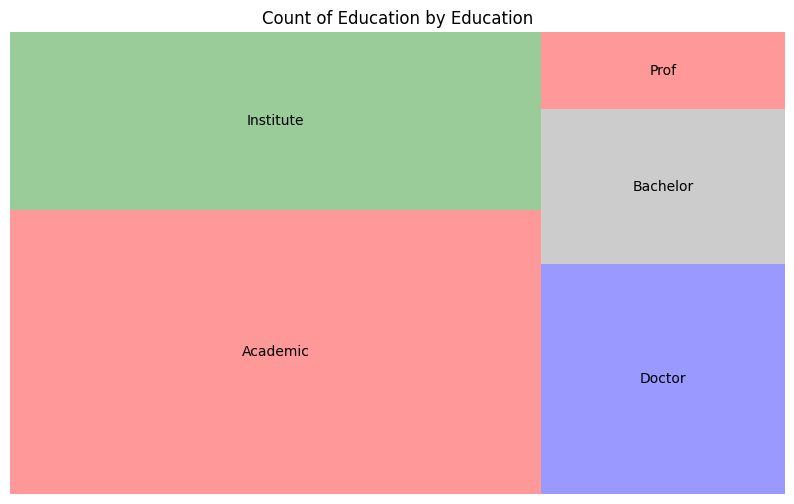

In [230]:
# Assuming df is your DataFrame
education_counts = df['Education'].value_counts()

# Plotting the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=education_counts, label=education_counts.index,color=["red","green","blue", "grey"], alpha=.4)
plt.title('Count of Education by Education')
plt.axis('off')
plt.show()

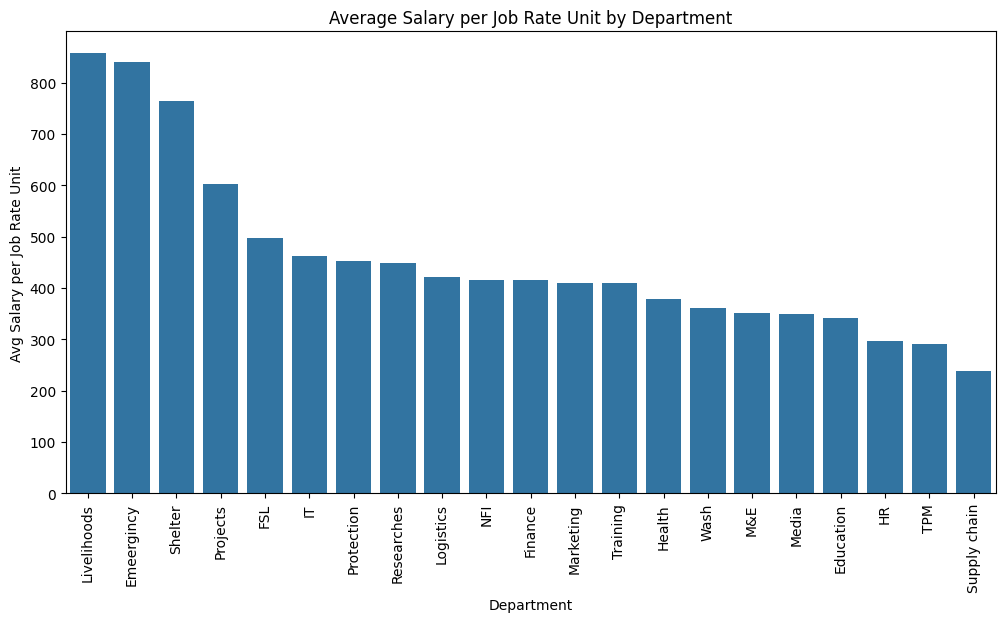

In [231]:
# Calculate average Salary per Job Rate Unit by Department
avg_salary_by_department = df.groupby('Department')['Salary per Job Rate Unit'].mean().reset_index(name='Avg Salary per Job Rate Unit')

# Sort by 'Avg Salary per Job Rate Unit' in descending order
avg_salary_by_department_sorted = avg_salary_by_department.sort_values(by='Avg Salary per Job Rate Unit', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='Avg Salary per Job Rate Unit', data=avg_salary_by_department_sorted)
plt.title('Average Salary per Job Rate Unit by Department')
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Avg Salary per Job Rate Unit')
plt.show()


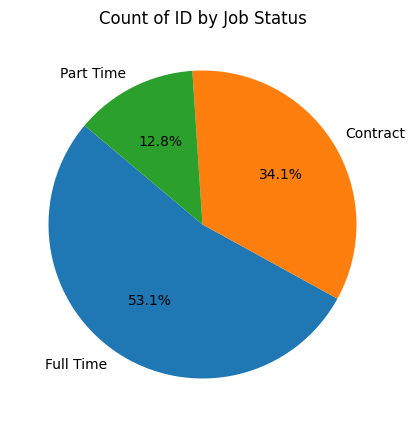

In [232]:
# Count of ID by Job Status
job_status_counts = df['Job Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(job_status_counts, labels=job_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of ID by Job Status')
plt.show()

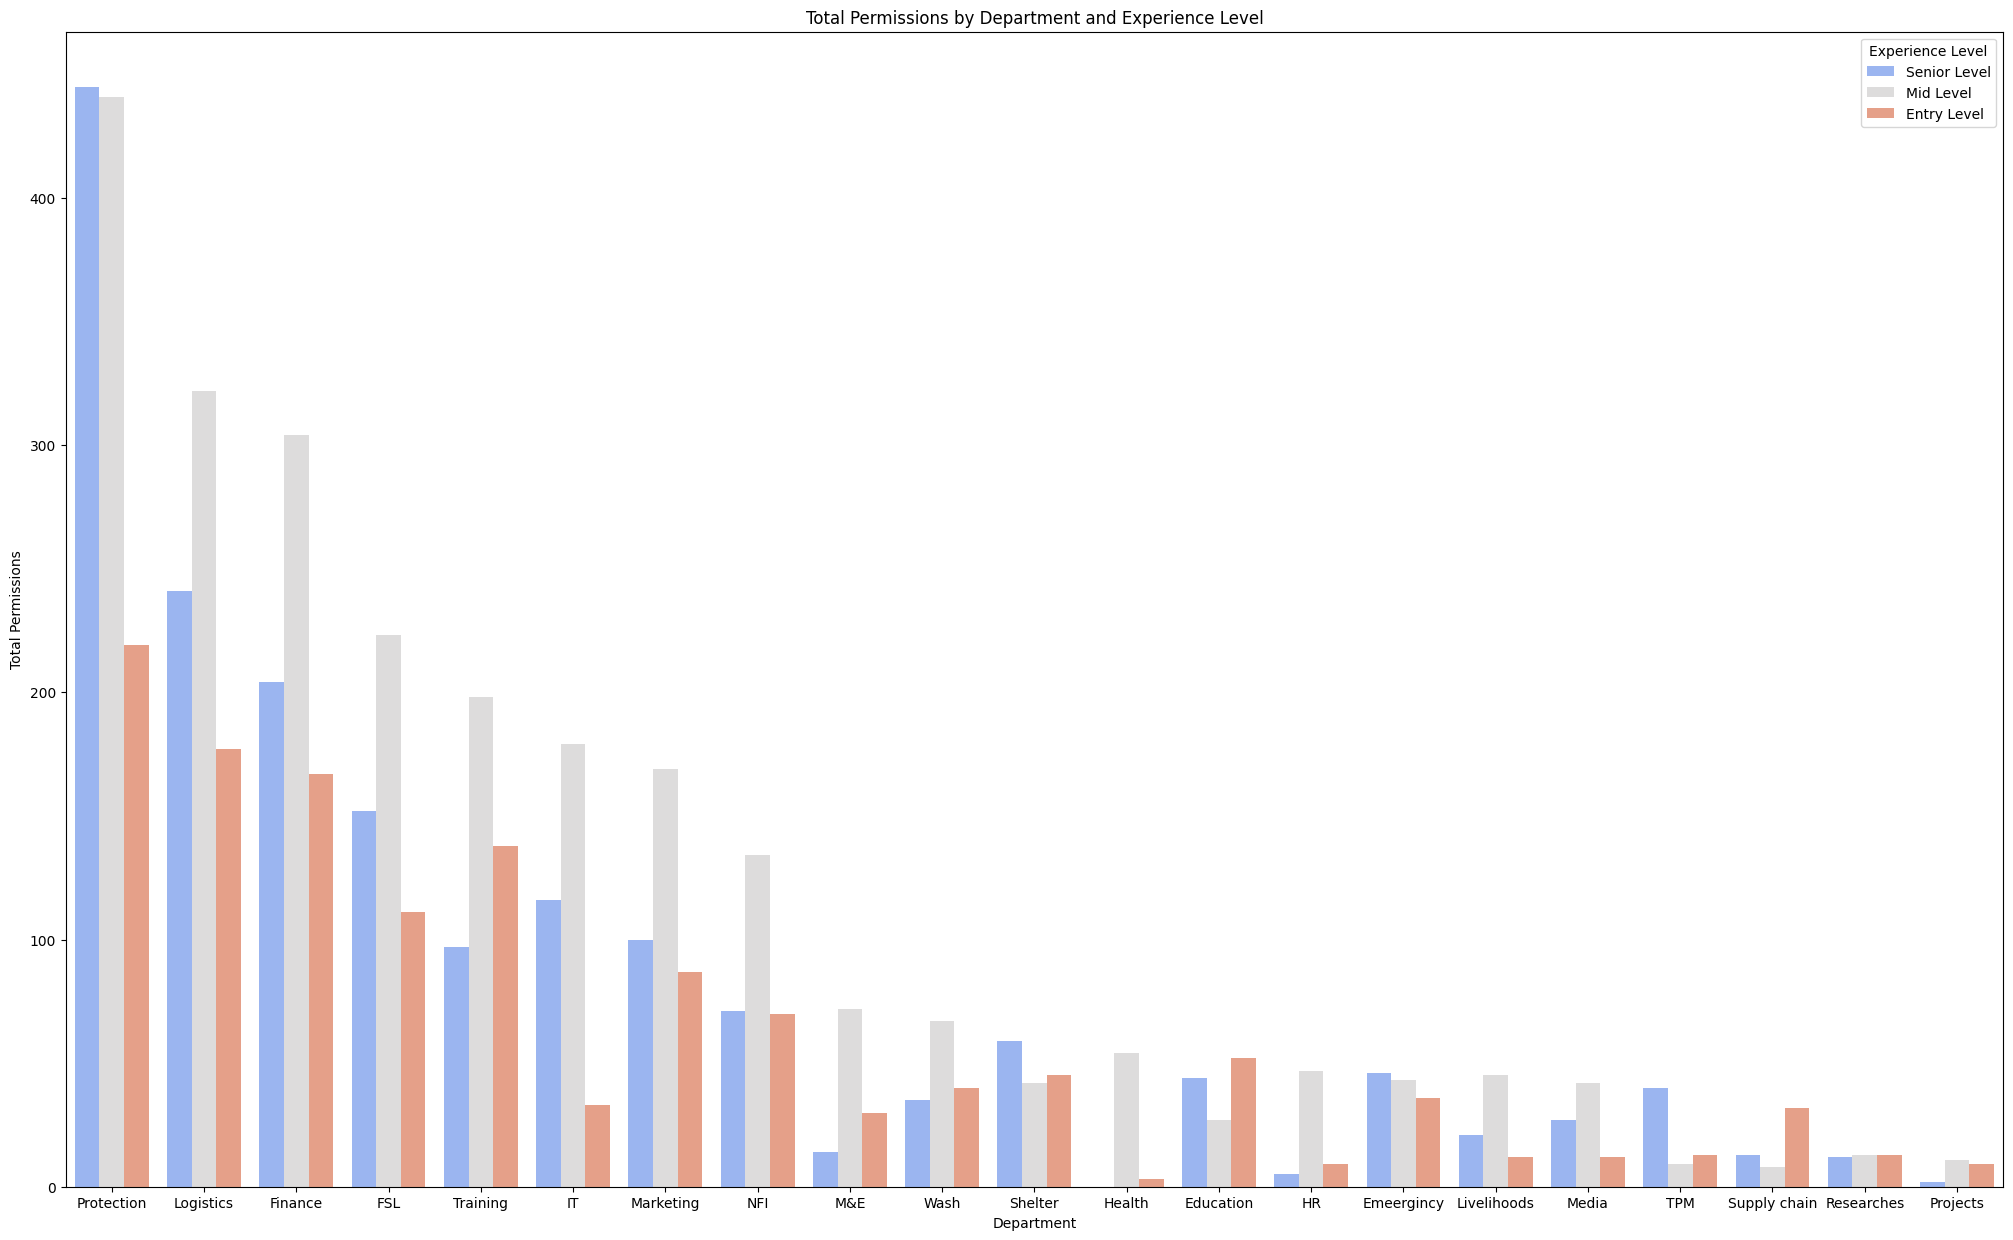

In [235]:
total_Permissions_by_Department_Experience_Level = df.groupby(['Department', 'Experience Level'])['Permissions'].sum().reset_index()
# Plotting
plt.figure(figsize=(25, 15))
sns.barplot(x="Department", y="Permissions", hue="Experience Level", data=total_Permissions_by_Department_Experience_Level_sorted, palette='coolwarm')
plt.title('Total Permissions by Department and Experience Level')
plt.xlabel('Department')
plt.ylabel('Total Permissions')
plt.legend(title='Experience Level')
plt.show()

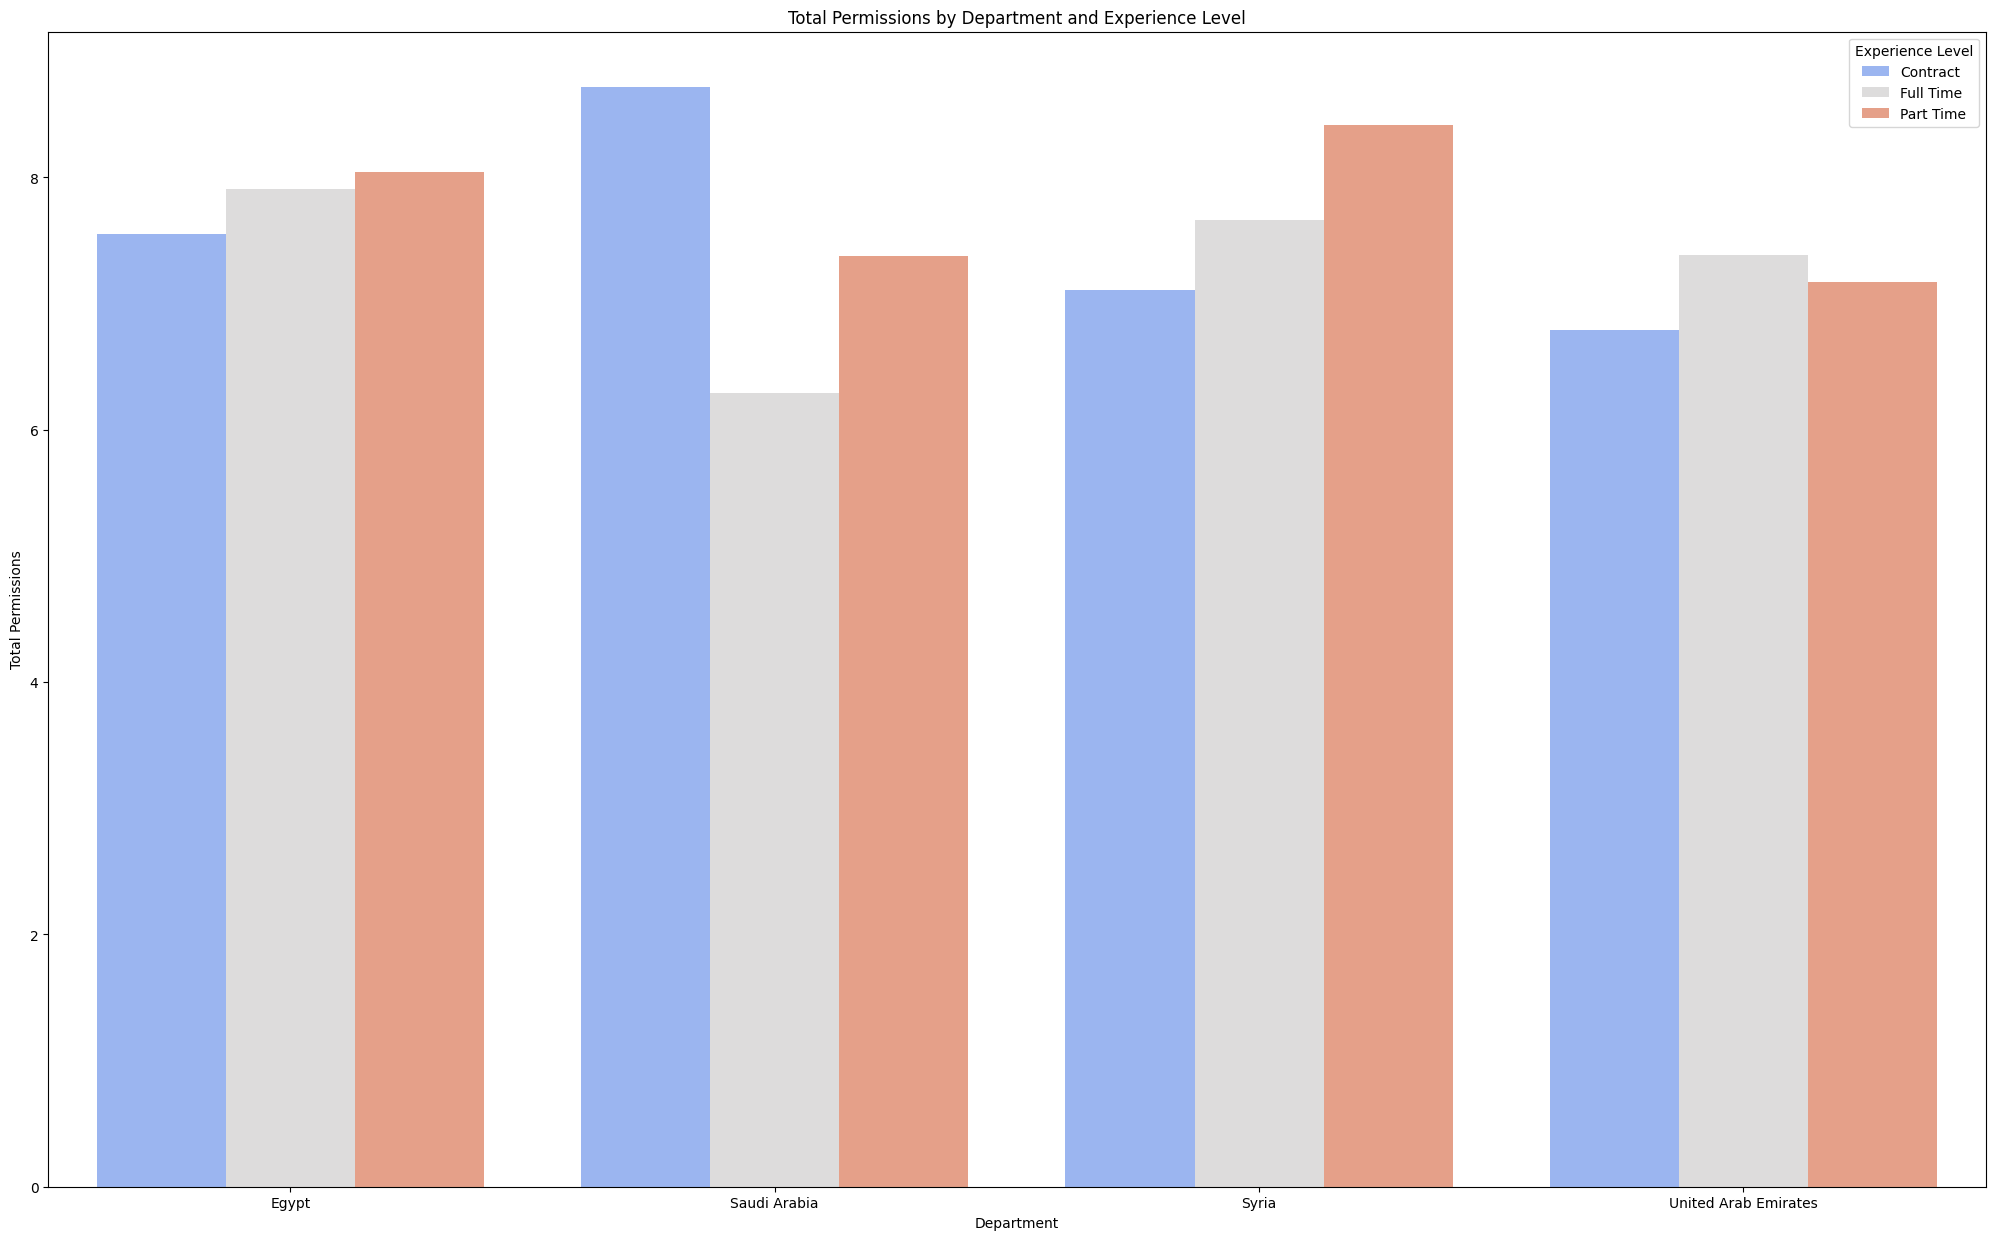

In [287]:
total_Permissions_by_Department_Experience_Level = df.groupby(['Location', 'Job Status'])['Permissions'].mean().reset_index()
# Plotting
plt.figure(figsize=(25, 15))
sns.barplot(x="Location", y="Permissions", hue="Job Status", data=total_Permissions_by_Department_Experience_Level, palette='coolwarm')
plt.title('Total Permissions by Department and Experience Level')
plt.xlabel('Department')
plt.ylabel('Total Permissions')
plt.legend(title='Experience Level')
plt.show()

Egypt and Saudi Arabia tend to have higher overall permission levels compared to Syria and the United Arab Emirates.
Contract employees generally have lower permission levels compared to Full-time and Part-time employees across all countries.
There seems to be a correlation between department and permission levels, with some departments consistently having higher or lower permissions.

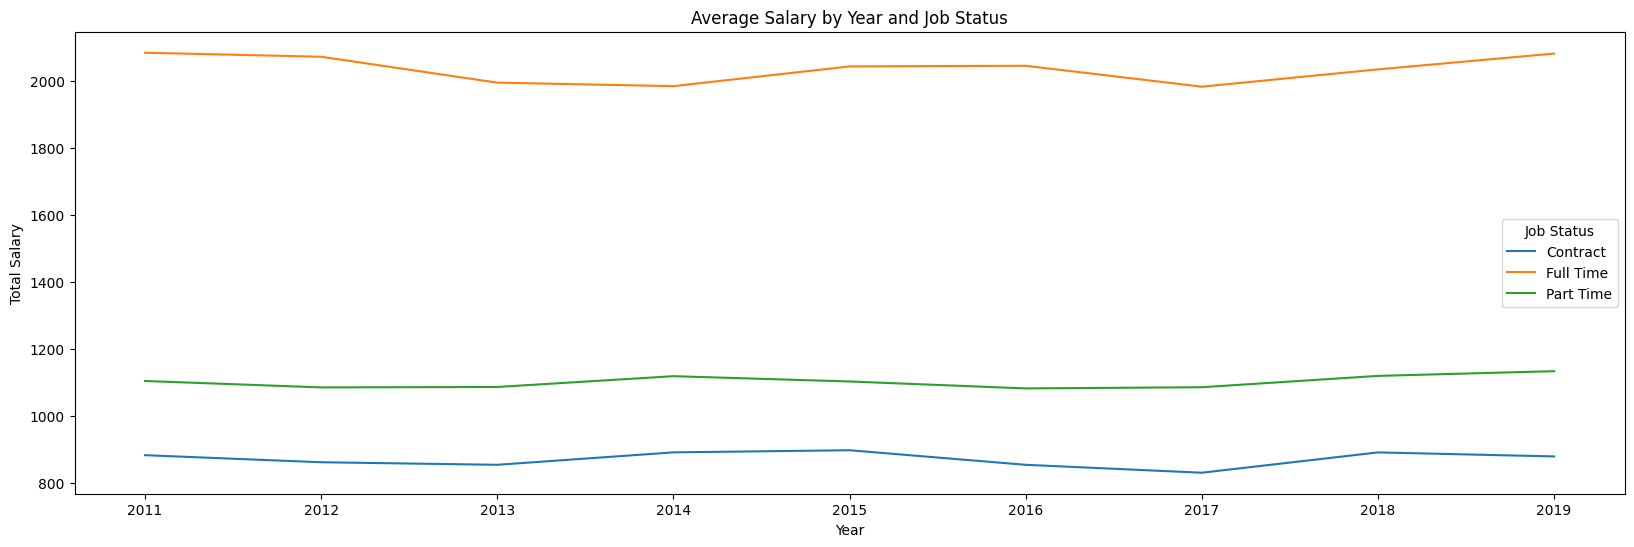

In [275]:
df_d = df.copy()  # Create a copy of the DataFrameLocation
df_d = df_d[df_d["Year"] != 2020] 

# Group by 'Year' and 'Job_Status' and sum the 'Salary'
average_Salary_by_Job_Status = df_d.groupby(['Year', 'Job Status'])['Salary'].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each job status separately
for status in average_Salary_by_Job_Status['Job Status'].unique():
    data_status = average_Salary_by_Job_Status[average_Salary_by_Job_Status['Job Status'] == status]
    ax.plot(data_status['Year'], data_status['Salary'], label=status)

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Total Salary')
ax.set_title('Average Salary by Year and Job Status')
ax.legend(title='Job Status')

plt.show()

Full-time Dominance: Full-time employees consistently have the highest average salary throughout the analyzed period.
Contract and Part-time Disparity: The average salary for contract employees is significantly lower than full-time, and part-time employees have the lowest average salary. This suggests a substantial pay gap between different employment types.